 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [63]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [66]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df= whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [67]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()
# YOUR CODE HERE

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
# YOUR CODE HERE
sp500_returns_df =sp500_returns_df.dropna().copy()

sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
# YOUR CODE HERE
sp500_returns_df = sp500_returns_df.rename(columns ={'Date': 'Date', 'Close': 'S&P 500'})
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined_portfolio_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis = "columns", join = 'inner')

 
combined_portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

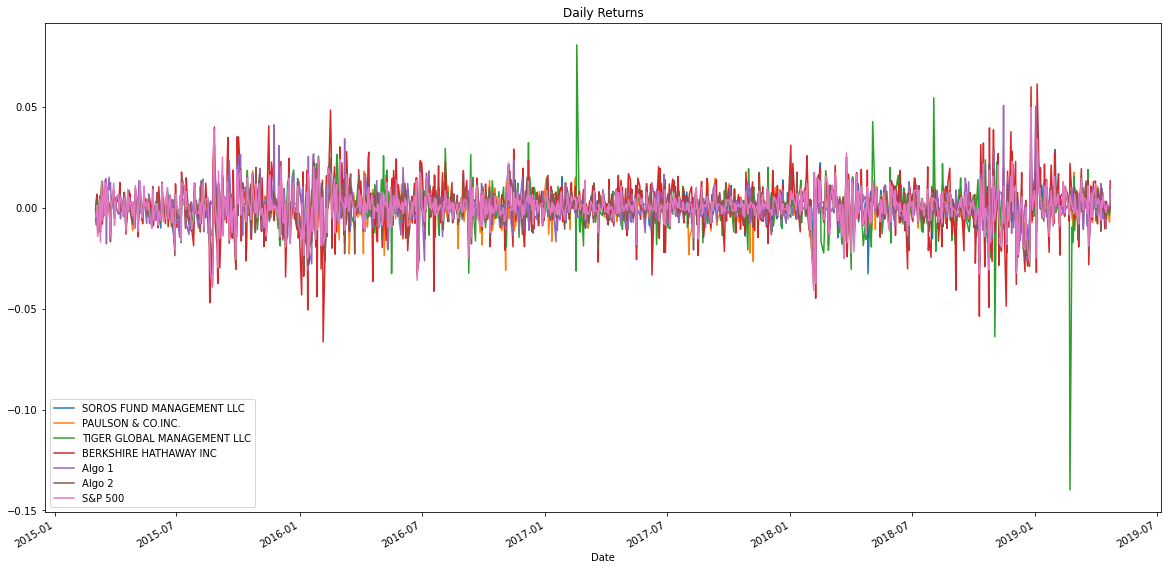

In [16]:
# Plot daily returns
# YOUR CODE HERE
combined_portfolio_df.plot(figsize = (20,10),title = "Daily Returns")

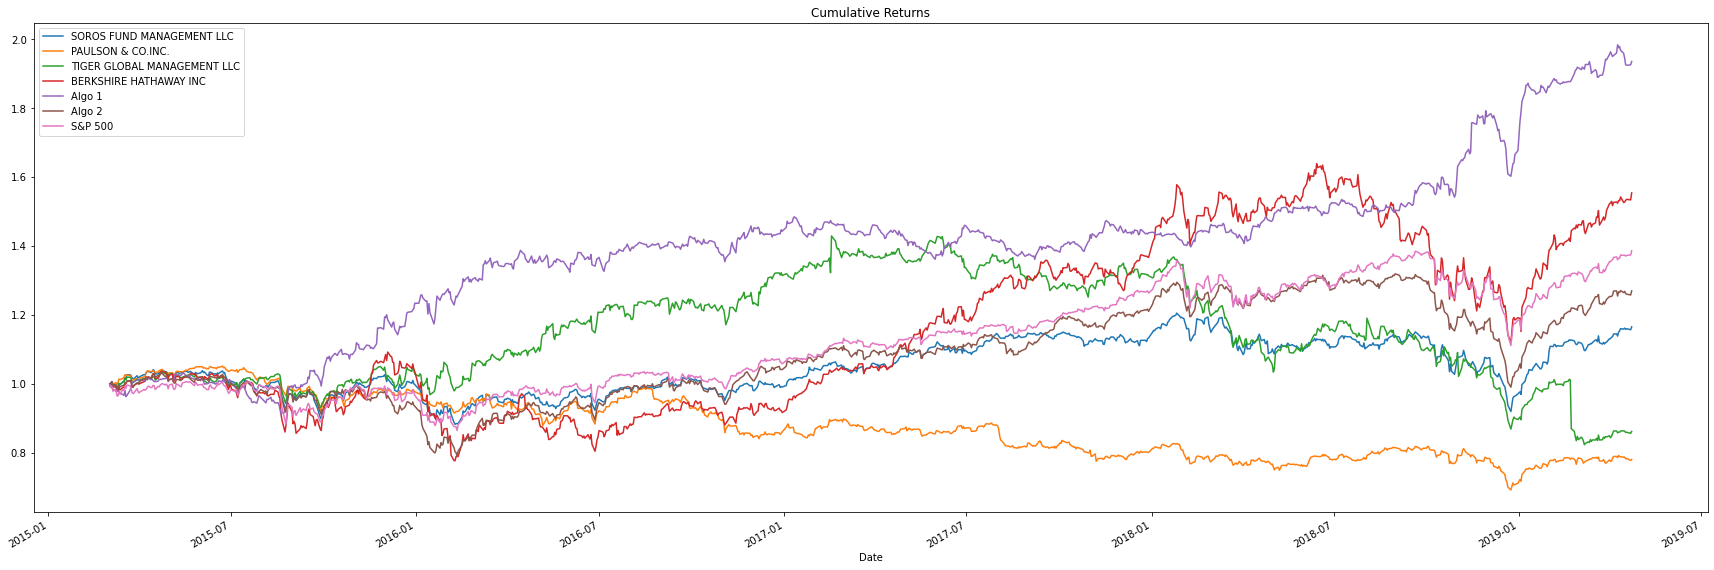

In [17]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_portfolio_df).cumprod()
cumulative_returns.plot(figsize=(30,10), title = "Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

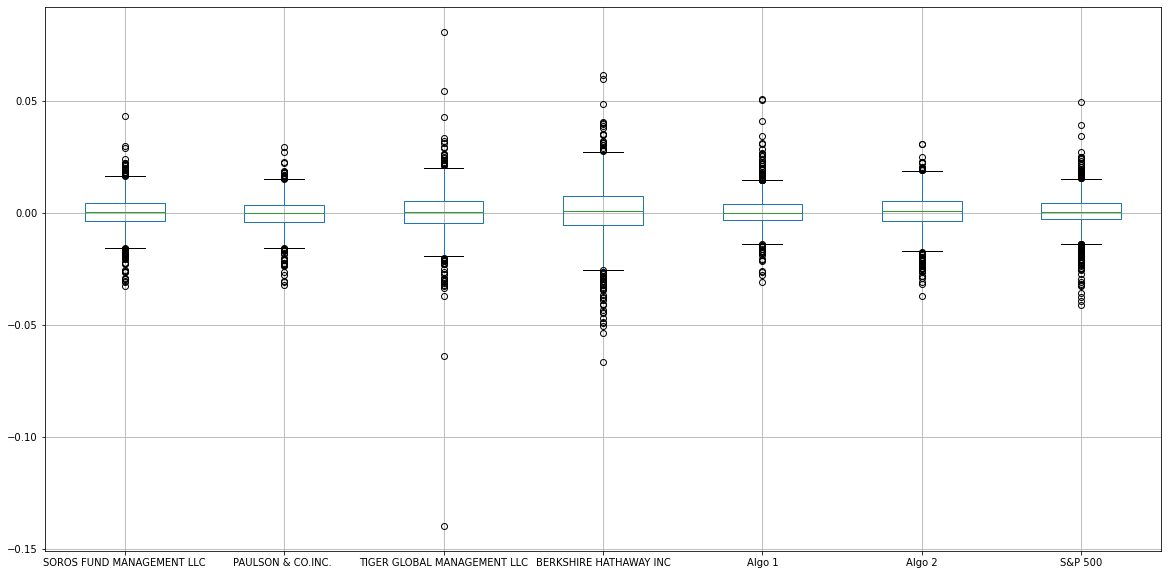

In [18]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_portfolio_df.boxplot(figsize=(20,10))

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
combined_portfolio_std_df = combined_portfolio_df.std()
combined_portfolio_std_df 

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [20]:
combined_portfolio_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [21]:
sp500_std =  combined_portfolio_df["S&P 500"].std()

In [22]:
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_portfolio_std_df > sp500_std

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [23]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combPort_ann_std =  combined_portfolio_std_df * np.sqrt(252)
combPort_ann_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

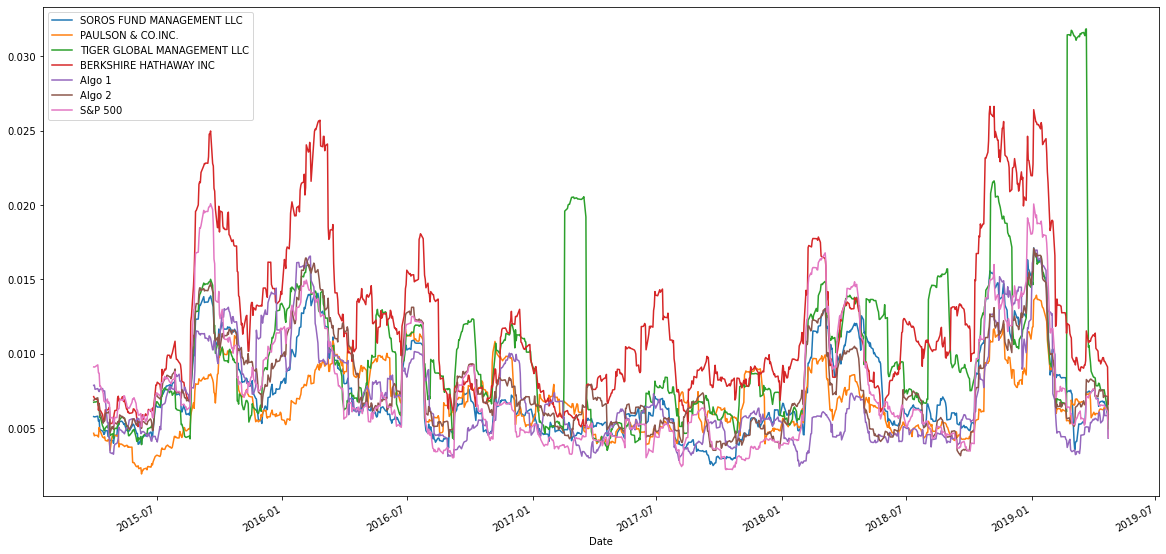

In [24]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

combined_portfolio_df.rolling(window=21).std().plot(figsize=(20,10))


In [25]:
# Construct a correlation table
# YOUR CODE HERE
portfolio_correlation = combined_portfolio_df.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR C

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000055
2019-04-17    0.000049
2019-04-18    0.000049
2019-04-22    0.000049
2019-04-23    0.000048
Length: 1043, dtype: float64

In [27]:
variance = combined_portfolio_df["S&P 500"].rolling(window = 60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

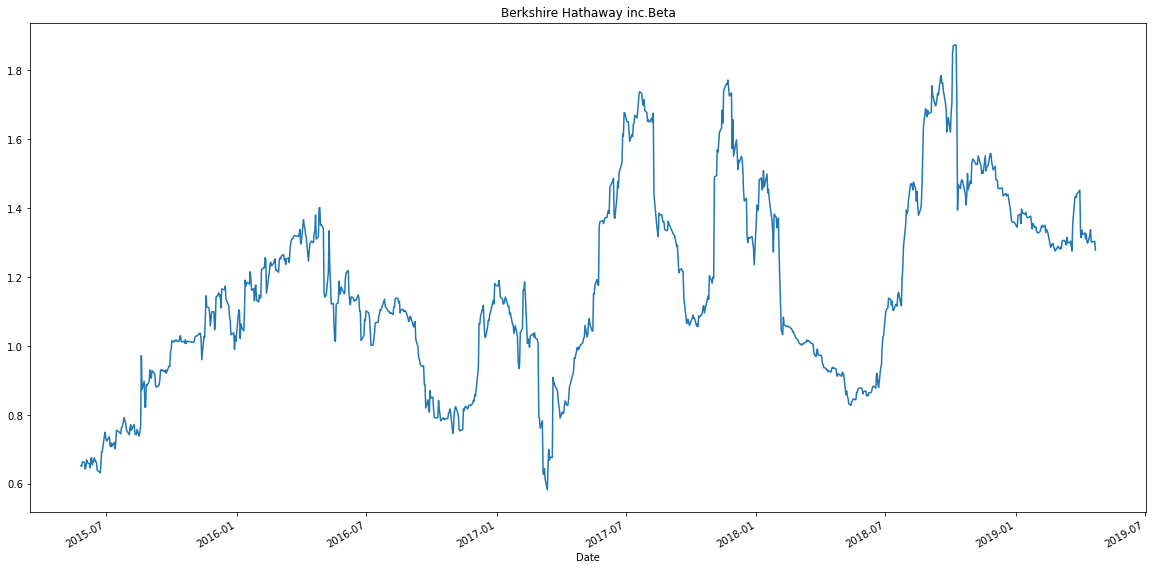

In [28]:
bkh_beta = covariance/variance
bkh_beta.plot(figsize = (20,10),title = "Berkshire Hathaway inc.Beta")

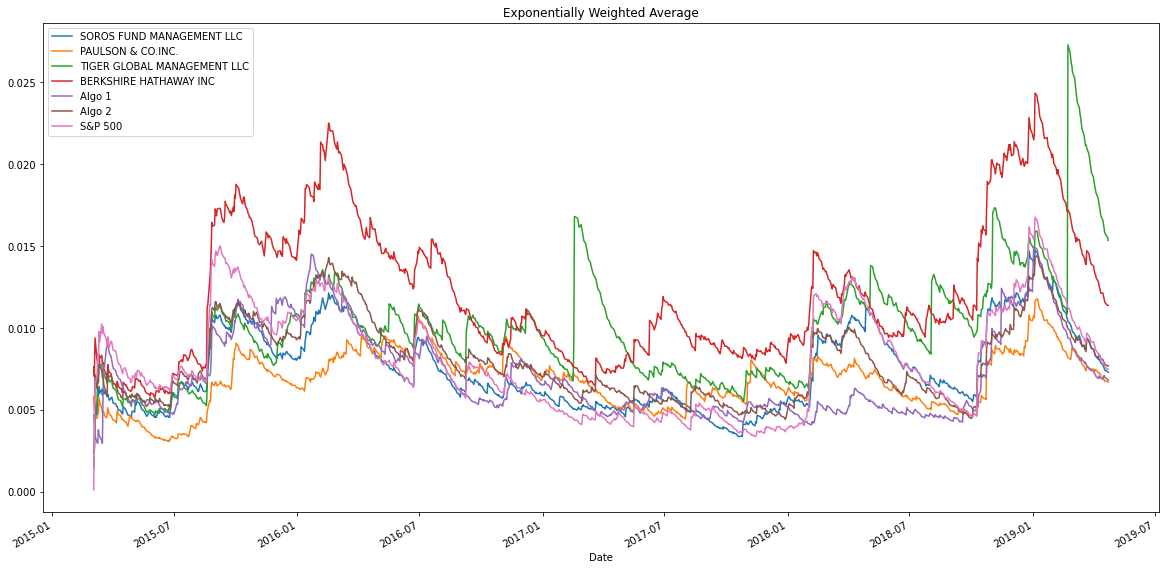

In [29]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
rolling_beta = combined_portfolio_df.ewm(halflife=21).std()
rolling_beta.plot(figsize = (20, 10), title = "Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [30]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
combined_portfolio_sharpe = (combined_portfolio_df.mean()*252) / (combined_portfolio_df.std()*np.sqrt(252))
combined_portfolio_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

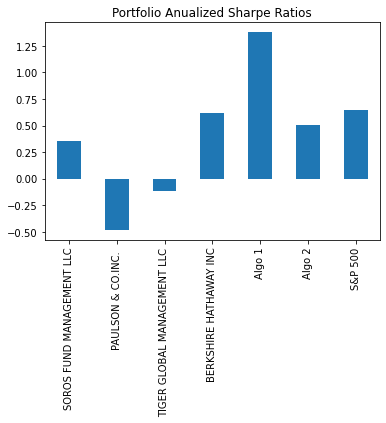

In [31]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
combined_portfolio_sharpe.plot(kind = "bar", title = "Portfolio Anualized Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 




## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Read the first stock

# YOUR CODE HERE

goog_path_csv = Path("Resources/goog.csv")
goog_returns_df = pd.read_csv(goog_path_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
goog_returns_df = goog_returns_df.sort_index()
goog_returns_df.head() 

,Symbol,Close
Date,,
2019-01-02,GOOG,1045.85
2019-01-03,GOOG,1016.06
2019-01-04,GOOG,1070.71
2019-01-07,GOOG,1068.39
2019-01-08,GOOG,1076.28


In [33]:
# Read the second stock
# YOUR CODE HERE
gs_path_csv = Path("Resources/gs.csv")

gs_returns_df = pd.read_csv(gs_path_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
gs_returns_df = gs_returns_df.sort_index()
gs_returns_df.head() 

,Symbol,Close
Date,,
2019-01-02,GS,172.03
2019-01-03,GS,169.51
2019-01-04,GS,175.05
2019-01-07,GS,176.02
2019-01-08,GS,175.37


In [34]:
# Read the third stock
# YOUR CODE HERE
wmt_path_csv = Path("Resources/WMT.csv")
wmt_returns_df = pd.read_csv(wmt_path_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
wmt_returns_df = wmt_returns_df.sort_index()
wmt_returns_df.head() 

,Symbol,Close
Date,,
2019-01-02,WMT,93.34
2019-01-03,WMT,92.86
2019-01-04,WMT,93.44
2019-01-07,WMT,94.54
2019-01-08,WMT,95.20


In [61]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
wmt_returns_df['Close'] = wmt_returns_df['Close'].astype('float')
gs_returns_df['Close'] = gs_returns_df['Close'].astype('float')
goog_returns_df['Close'] = goog_returns_df['Close'].astype('float')
my_portfolio_df = pd.concat([wmt_returns_df, gs_returns_df, goog_returns_df], axis = "rows", join = 'inner')
my_portfolio_df

,Symbol,Close
Date,,
2019-01-02,WMT,93.34
2019-01-03,WMT,92.86
2019-01-04,WMT,93.44
2019-01-07,WMT,94.54
2019-01-08,WMT,95.20
...,...,...
2019-12-23,GOOG,1348.84
2019-12-24,GOOG,1343.56
2019-12-26,GOOG,1360.40


In [51]:
# Reset the index
# YOUR CODE HERE
my_portfolio_df.reset_index()

,Date,Symbol,Close
0,2019-01-02,WMT,93.34
1,2019-01-03,WMT,92.86
2,2019-01-04,WMT,93.44
3,2019-01-07,WMT,94.54
4,2019-01-08,WMT,95.20
...,...,...,...
748,2019-12-23,GOOG,1348.84
749,2019-12-24,GOOG,1343.56
750,2019-12-26,GOOG,1360.40
751,2019-12-27,GOOG,1351.89


In [52]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
all_prices = my_portfolio_df.pivot_table(values = "Close", index = "Date", columns = "Symbol")
all_prices.head()

Symbol,GOOG,GS,WMT
Date,,,
2019-01-02,1045.85,172.03,93.34
2019-01-03,1016.06,169.51,92.86
2019-01-04,1070.71,175.05,93.44
2019-01-07,1068.39,176.02,94.54
2019-01-08,1076.28,175.37,95.20


In [115]:
# Drop Nulls
# YOUR CODE HERE
all_prices = all_prices.dropna().copy()
all_prices.isnull().sum()

Symbol
GOOG    0
GS      0
WMT     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [116]:
all_prices = all_prices.rename(columns ={'Date': 'Date', 'Close': 'Custom'})
all_prices.head()

Symbol,GOOG,GS,WMT
Date,,,
2019-01-02,1045.85,172.03,93.34
2019-01-03,1016.06,169.51,92.86
2019-01-04,1070.71,175.05,93.44
2019-01-07,1068.39,176.02,94.54
2019-01-08,1076.28,175.37,95.20


In [68]:
all_returns = all_prices.pct_change()
all_returns.head()

Symbol,GOOG,GS,WMT
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.028484,-0.014649,-0.005142
2019-01-04,0.053786,0.032682,0.006246
2019-01-07,-0.002167,0.005541,0.011772
2019-01-08,0.007385,-0.003693,0.006981


In [69]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_portfolio = all_returns.dot(weights)
my_portfolio

Date
2019-01-02         NaN
2019-01-03   -0.016092
2019-01-04    0.030905
2019-01-07    0.005049
2019-01-08    0.003558
                ...   
2019-12-23   -0.003444
2019-12-24    0.001233
2019-12-26    0.006091
2019-12-27   -0.002683
2019-12-30   -0.005656
Length: 251, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [117]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_portfolios_df = pd.concat([combined_portfolio_df, my_portfolio ], axis = "columns", join = 'inner')
all_portfolios_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2019-01-02,0.006027,0.015429,0.007881,-0.001554,0.050342,0.018022,0.001269,NaN
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.016092
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.030905
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.005049
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.003558
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.006491
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.013255
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.003118


In [118]:
# Set column names
all_portfolios_df.columns = ['SOROS FUND', 'PAULSON & CO', 'TIGER GLOBAL MGM', 'BERKSHIRE HATHAWAY', 'ALGO 1', 'ALGO 2', 'S&P 500', 'CUSTOM']
all_portfolios_df
 

,SOROS FUND,PAULSON & CO,TIGER GLOBAL MGM,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,S&P 500,CUSTOM
Date,,,,,,,,
2019-01-02,0.006027,0.015429,0.007881,-0.001554,0.050342,0.018022,0.001269,NaN
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.016092
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.030905
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.005049
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.003558
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.006491
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.013255
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.003118


In [104]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolios_df.dropna().copy()

,SOROS FUND,PAULSON & CO,TIGER GLOBAL MGM,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,S&P 500,CUSTOM
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.016092
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.030905
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.005049
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.003558
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098,0.000504
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.006491
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.013255
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.003118


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [105]:
# Risk
# YOUR CODE HERE
all_portfolios_std = all_portfolios_df.std()
all_portfolios_std_ann = all_portfolios_std * np.sqrt(252)
all_portfolios_std_ann

SOROS FUND            0.118004
PAULSON & CO          0.112768
TIGER GLOBAL MGM      0.288383
BERKSHIRE HATHAWAY    0.203139
ALGO 1                0.126685
ALGO 2                0.123991
S&P 500               0.124373
CUSTOM                0.147889
dtype: float64

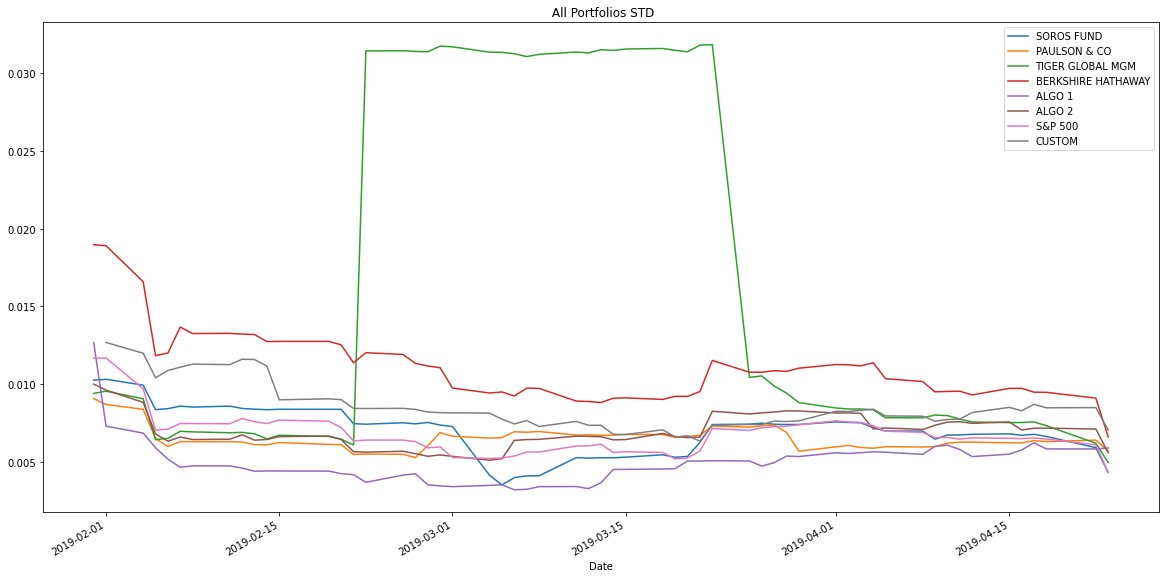

In [108]:
# Rolling
# YOUR CODE HERE
all_portfolios_df.rolling(window=21).std().plot(figsize = (20,10), title = " All Portfolios STD") 

In [109]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
all_portfolios_df_sharpe = (all_portfolios_df.mean()*252) / (all_portfolios_df.std()*np.sqrt(252))
all_portfolios_df_sharpe

SOROS FUND            5.126053
PAULSON & CO          2.733353
TIGER GLOBAL MGM     -0.291710
BERKSHIRE HATHAWAY    4.383861
ALGO 1                3.772691
ALGO 2                5.363331
S&P 500               4.202785
CUSTOM                3.596637
dtype: float64

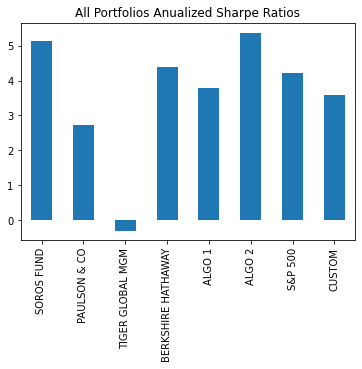

In [120]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

all_portfolios_df_sharpe.plot(kind = "bar", title = "All Portfolios Anualized Sharpe Ratios")

In [123]:
# Create a correlation analysis
# YOUR CODE HERE
all_portfolios_df_corr = all_portfolios_df.corr()

all_portfolios_df_corr

,SOROS FUND,PAULSON & CO,TIGER GLOBAL MGM,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,S&P 500,CUSTOM
SOROS FUND,1.000000,0.741533,0.358811,0.736849,0.104970,0.797673,0.787772,0.571992
PAULSON & CO,0.741533,1.000000,0.273157,0.590406,0.264068,0.751038,0.678218,0.519306
TIGER GLOBAL MGM,0.358811,0.273157,1.000000,0.132933,0.052753,0.204530,0.247476,0.233906
BERKSHIRE HATHAWAY,0.736849,0.590406,0.132933,1.000000,0.086644,0.747899,0.872111,0.668770
ALGO 1,0.104970,0.264068,0.052753,0.086644,1.000000,0.241655,0.081517,0.065990
ALGO 2,0.797673,0.751038,0.204530,0.747899,0.241655,1.000000,0.852089,0.672495
S&P 500,0.787772,0.678218,0.247476,0.872111,0.081517,0.852089,1.000000,0.748027
CUSTOM,0.571992,0.519306,0.233906,0.668770,0.065990,0.672495,0.748027,1.000000


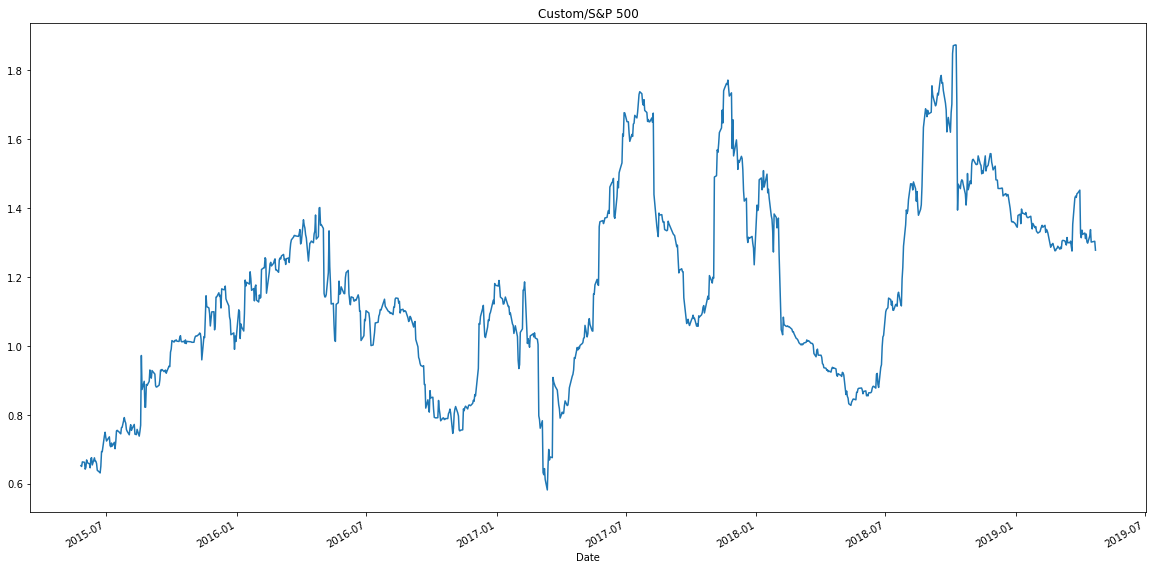

In [114]:
# Beta
# YOUR CODE HERE
covariance_custom = my_portfolio.rolling(window = 60).cov(combined_portfolio_df["S&P 500"])

variance_custom = combined_portfolio_df["S&P 500"].rolling(window = 60).var()
Custom_beta = covariance/variance
Custom_beta.plot(figsize = (20,10),title = "Custom/S&P 500")
